In [48]:
#This is the data cleaning file - please push new version through the data cleaning branch in git 

In [49]:
#import the necessary packages 
import pandas as pd 
import numpy as np 
import sklearn

In [50]:
#import the dataset as a panda dataframe 
df = pd.read_excel("group_assign/RBA_KYC_Accounts_ALL_Ids.xlsx")

In [51]:
df['Risk_Description'] = df['rba_grade_desc']
df.drop(['rba_grade_desc'], axis = 1, inplace = True) 

In [52]:
df.describe(include  = 'all')

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,...,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,score_card_Desc,rbaValue,Risk_Description
count,224868.0,224868.000000,2.248680e+05,224868,224868.000000,224868,224868,224868.000000,224272,221429,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868,224868,224868,0.0,224868.000000,224868
unique,NaN,NaN,NaN,220434,NaN,7041,2,NaN,62,67,...,NaN,NaN,NaN,NaN,1,3,4,NaN,NaN,3
top,NaN,NaN,NaN,020902507770010010000,NaN,2013-11-20,N,NaN,JO,JO,...,NaN,NaN,NaN,NaN,2019-01-24,L,I-Existing,NaN,NaN,Low
freq,NaN,NaN,NaN,26,NaN,1079,219791,NaN,219253,213141,...,NaN,NaN,NaN,NaN,224868,159680,178495,NaN,NaN,159680
mean,1.0,448.451323,4.394503e+16,NaN,1.114418,NaN,NaN,1.021221,NaN,NaN,...,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,NaN,NaN,NaN,17.624194,NaN
std,0.0,228.193308,2.349321e+16,NaN,0.318319,NaN,NaN,0.144122,NaN,NaN,...,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,NaN,NaN,NaN,8.368345,NaN
min,1.0,201.000000,2.020028e+09,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,4.080000,NaN
25%,1.0,208.000000,2.070207e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,13.330000,NaN
50%,1.0,401.000000,4.011205e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,16.530000,NaN
75%,1.0,701.000000,7.012410e+16,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,21.330000,NaN


## Creating the variable creationDate_indays

In [53]:
df['creationDate_indays'] = df['creationDate'].astype('datetime64[ns]').max()-df['creationDate'].astype('datetime64[ns]') 
df['creationDate_indays'].head()

0   1295 days
1   1860 days
2   1860 days
3   1860 days
4   1860 days
Name: creationDate_indays, dtype: timedelta64[ns]

## Creating the variable date of birth

In [54]:
def f(end):
    global max_date
    try:
        r = relativedelta(max_date, end) 
        return(r.years)
    except:
        return(0)
#    r = relativedelta(pd.to_datetime('now'), end) 
#    return '{} years {} days'.format(r.years, r.days)

In [55]:
max_date = df['dateOfBirth'].astype('datetime64[ns]').max()
df['age'] = df['dateOfBirth'].astype('datetime64[ns]').apply(f)
df['age'].head()

0    0
1    0
2    0
3    0
4    0
Name: age, dtype: int64

In [56]:
#assigning df to another var / avoid reloading the dataset if an eroor arises 
df1 = df 

## Checking for percentage (%) of missing values

In [57]:
print(100*df.isnull().sum()/df.isnull().count())

org_code                        0.000000
branchCode                      0.000000
customerId                      0.000000
fullaccount                     0.000000
customerType                    0.000000
creationDate                    0.000000
onboarding                      0.000000
residentStatus                  0.000000
residentCountry                 0.265044
nationalityOriginal             1.529342
extraNationality               99.202643
dateOfBirth                     2.096786
age_in_year                     2.096786
birthCountry                  100.000000
birthPlace                      9.713254
profession                     64.535639
companyType                    49.048331
giinCode                       99.994664
lastUpdate                    100.000000
status                          0.000000
ledgerCode                      0.000000
accountCurrency                 0.000000
jointAccount                    0.000000
IsBlackListed                   0.000000
CUS_CLASS       

In [73]:
#Other metrics for null values

import re
#interrogation points
for name in df1.columns:
    li = []
    for el in df1[name].astype(str):
        li.append(len(re.findall("\?.*",el)))
    print(name)
    print(100 * sum(li) / len(df1[name]))
#birthplace  has 89.3% ? mark + 9.7% of missing values = 99% missing data

org_code
0.0
branchCode
0.0
customerId
0.0
fullaccount
0.0
customerType
0.0
creationDate
0.0
onboarding
0.0
residentStatus
0.0
residentCountry
0.0
nationalityOriginal
0.0
extraNationality
0.0
dateOfBirth
0.0
age_in_year
0.0
birthPlace
89.30572602593521
profession
0.0
companyType
0.0
giinCode
0.0
status
0.0
ledgerCode
0.0
accountCurrency
0.0
jointAccount
0.0
IsBlackListed
0.0
CUS_CLASS
0.0
ECO_SEC
0.0
TYPE_OF_DEP
0.0
GENDER
0.0
LEGAL_STA_CODE
0.0
avg_last_10_days
0.0
avg_last_30_days
0.0
avg_last_90_days
0.0
number_of_cash_dep_90_days
0.0
avg_cash_deposit_90_days
0.0
number_of_deposit_90_days
0.0
avg_of_dep_90_days
0.0
number_of_cash_wd_90_days
0.0
avg_of_cash_wd_90_days
0.0
number_of_wd_90_days
0.0
avg_of_wd_90_days
0.0
date_of_assessment
0.0
rbaGradeAbrv
0.0
score_card
0.0
rbaValue
0.0
Risk_Description
0.0
creationDate_indays
0.0


In [74]:
#check for string na 
def inter(df):
    summed = []
    for col in df.columns:
        indiv = []
        for el in df[col].astype(str):
            if el == 'nan' or el == 'NaN':
                indiv.append(el)
        summed.append(col)
        summed.append(100 * len(indiv) / len(df[col]))

    return summed

inter(df1)

['org_code',
 0.0,
 'branchCode',
 0.0,
 'customerId',
 0.0,
 'fullaccount',
 0.0,
 'customerType',
 0.0,
 'creationDate',
 0.0,
 'onboarding',
 0.0,
 'residentStatus',
 0.0,
 'residentCountry',
 0.2650443815927566,
 'nationalityOriginal',
 1.5293416582172652,
 'extraNationality',
 99.20264332853051,
 'dateOfBirth',
 2.0967856698151803,
 'age_in_year',
 2.0967856698151803,
 'birthPlace',
 9.71325399790099,
 'profession',
 64.53563868580679,
 'companyType',
 49.04833057616024,
 'giinCode',
 99.99466353594109,
 'status',
 0.0,
 'ledgerCode',
 0.0,
 'accountCurrency',
 0.0,
 'jointAccount',
 0.0,
 'IsBlackListed',
 0.0,
 'CUS_CLASS',
 0.0,
 'ECO_SEC',
 0.0,
 'TYPE_OF_DEP',
 0.0,
 'GENDER',
 53.591885016987746,
 'LEGAL_STA_CODE',
 1.1633491648433747,
 'avg_last_10_days',
 0.0,
 'avg_last_30_days',
 0.0,
 'avg_last_90_days',
 0.0,
 'number_of_cash_dep_90_days',
 0.0,
 'avg_cash_deposit_90_days',
 0.0,
 'number_of_deposit_90_days',
 0.0,
 'avg_of_dep_90_days',
 0.0,
 'number_of_cash_wd_90_da

# Making some graph 

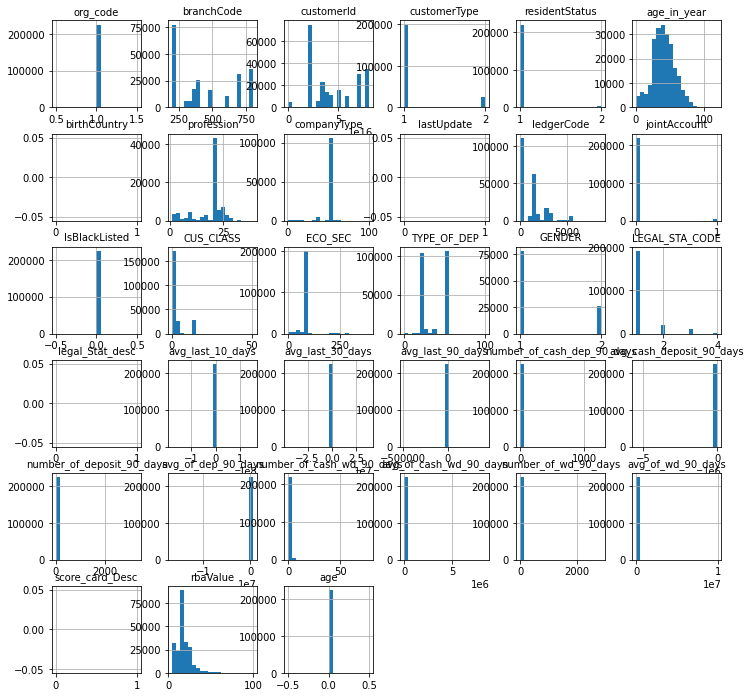

In [60]:
%matplotlib inline
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

# Insert here decription of variable 
- RBA (target in regaression):

# Missing values
1. drop the 100% missing values column 
2. drop the column with a single value 

In [61]:
print(np.mean(df1['age']))
print('age column is fully equal to 0 lets drop it ')

0.0
age column is fully equal to 0 lets drop it 


In [62]:
df1 = df1.drop(["score_card_Desc","birthCountry","lastUpdate","legal_Stat_desc","age","giinCode","birthPlace"], axis = 1)
df1.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,...,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,score_card,rbaValue,Risk_Description,creationDate_indays
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,...,0,0.0,0,0.0,2019-01-24,L,E-Existing,13.20,Low,1295 days
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,...,0,0.0,0,0.0,2019-01-24,L,I-Existing,16.93,Low,1860 days
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,...,0,0.0,0,0.0,2019-01-24,L,I-Existing,16.93,Low,1860 days
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,...,1,50.0,1,50.0,2019-01-24,L,I-Existing,16.93,Low,1860 days
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,...,1,56.0,1,56.0,2019-01-24,L,I-Existing,16.93,Low,1860 days


In [93]:
#check for other column with a single value 
{col: df1[col].nunique() for col in df1.columns}

#Org_code, giincode, status,isBlackListed,date_of_assessment have only 1 values; flag variable ??

{'org_code': 1,
 'branchCode': 30,
 'customerId': 75339,
 'fullaccount': 220434,
 'customerType': 2,
 'creationDate': 7041,
 'onboarding': 2,
 'residentStatus': 2,
 'residentCountry': 62,
 'nationalityOriginal': 67,
 'extraNationality': 35,
 'dateOfBirth': 21457,
 'age_in_year': 106,
 'birthPlace': 1000,
 'profession': 32,
 'companyType': 33,
 'giinCode': 1,
 'status': 1,
 'ledgerCode': 227,
 'accountCurrency': 20,
 'jointAccount': 2,
 'IsBlackListed': 1,
 'CUS_CLASS': 10,
 'ECO_SEC': 206,
 'TYPE_OF_DEP': 51,
 'GENDER': 2,
 'LEGAL_STA_CODE': 4,
 'avg_last_10_days': 106519,
 'avg_last_30_days': 94287,
 'avg_last_90_days': 37665,
 'number_of_cash_dep_90_days': 151,
 'avg_cash_deposit_90_days': 5780,
 'number_of_deposit_90_days': 293,
 'avg_of_dep_90_days': 11215,
 'number_of_cash_wd_90_days': 45,
 'avg_of_cash_wd_90_days': 5348,
 'number_of_wd_90_days': 259,
 'avg_of_wd_90_days': 8674,
 'date_of_assessment': 1,
 'rbaGradeAbrv': 3,
 'score_card': 4,
 'rbaValue': 692,
 'Risk_Description': 

# Cleaning data types

In [64]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def clear_backslash(text):
    ''' Function to clear backslash as they cause all sort of troubles '''
    result = text
    if "\\" in text:
        result = '0'
    return (result)

In [65]:
#CREATING A FUNCTION TO TRANSFORM TEXT (example 3.17B) INTO NUMBER (REAL NUMBERS, example 3,170,000,000).
def text_to_num(text):
    ''' DOC STRING: Function to transform numbers with letter into pure numbers, example: 3.17B into 3,170,000,000 '''
    if type(text) != str:
        return(text)
    result = 0.0  
    text = text.replace(",", "")        
    try:
            if text[-1] in d:
                num, magnitude = text[:-1], text[-1]
                result = float(num) * (10 ** d[magnitude])  #this case is when "text" has T, B, M, k or %
            else:
                result = float(text) #this case is when "text" is string but look like a numeric
    except:
        try:
            result = 1.0*text #this is when "text" is already numeric
        except:
            result = text #it will reach this case when it is impossible to transform into numeric
    return(result)

In [66]:
for fieldname in df1.columns:
    try:
        print(fieldname)
        array_tmp = np.vectorize(clear_backslash)(df[fieldname].astype(str))
        df[fieldname] = np.vectorize(text_to_num)(array_tmp)
    except: #It is a date
        print("ERROR:",fieldname, "is a date type!")

org_code
branchCode
customerId
fullaccount
customerType
creationDate
onboarding
residentStatus
residentCountry
nationalityOriginal
extraNationality
dateOfBirth
age_in_year
birthPlace
profession
companyType
giinCode
status
ledgerCode
accountCurrency
jointAccount
IsBlackListed
CUS_CLASS
ECO_SEC
TYPE_OF_DEP
GENDER
LEGAL_STA_CODE
avg_last_10_days
avg_last_30_days
avg_last_90_days
number_of_cash_dep_90_days
avg_cash_deposit_90_days
number_of_deposit_90_days
avg_of_dep_90_days
number_of_cash_wd_90_days
avg_of_cash_wd_90_days
number_of_wd_90_days
avg_of_wd_90_days
date_of_assessment
rbaGradeAbrv
score_card
rbaValue
Risk_Description
creationDate_indays


# outliers 

In [103]:
def distribution(x):
    try:
        x.dropna()
        stdev = np.std(x)
        meanf = np.average(x)
        #replace measure of outlier here 
        H = meanf + 2 * stdev
        L = meanf - 2 * stdev
        if (L < 0):
            L = 0
        out = [H,L]
        return(out)
    except:
        pass 

#compare with each value to the respective column lower and higher bounds for outliers (bounds defined in distribution fun)
def outliers(x):
    try:
        limit = x.apply(distribution)
        y = pd.DataFrame()
        dt = pd.DataFrame(x)
        print(limit)
        for el in dt.columns.astype(int):
            high = limit[el].loc[0]
            low = limit[el].loc[1]
            print("a")
            for ele in dt[el]:
                print(ele)
                break
                if ((ele > high)  |  (ele < low)):
                    y = y.append([[el, high,low, ele]])
    except:
        pass
    y.columns =[ 'column', 'Hlimit', 'Llimit' ,'value']
    return(y)

b= outliers(df1)

   org_code  branchCode    customerId fullaccount  customerType creationDate  \
0       1.0  904.836923  9.093135e+16        None      1.751055         None   
1       1.0    0.000000  0.000000e+00        None      0.477781         None   

  onboarding  residentStatus residentCountry nationalityOriginal  ...  \
0       None        1.309464            None                None  ...   
1       None        0.732978            None                None  ...   

  number_of_cash_wd_90_days avg_of_cash_wd_90_days  number_of_wd_90_days  \
0                  2.605471           41038.492131             25.616448   
1                  0.000000               0.000000              0.000000   

  avg_of_wd_90_days  date_of_assessment  rbaGradeAbrv score_card   rbaValue  \
0     118847.046679                None          None       None  34.360847   
1          0.000000                None          None       None   0.887540   

   Risk_Description creationDate_indays  
0              None           

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements